<a href="https://colab.research.google.com/github/kumagaimasahito/Tech/blob/master/programming/20200811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install japanize-matplotlib

import urllib.request
import json
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font="IPAexGothic")

     |████████████████████████████████| 4.1MB 2.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=0e3f975d25842303c7d16659995aadbcaa3e08608df24ca52b3411b9bf431dae
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = 'http://api.e-stat.go.jp/rest/2.1/app/json/getStatsData?appId=7ac4e0c84587d377e6db85e1c4ee5cf5daf870f0&lang=J&statsDataId=0003005798&metaGetFlg=Y&cntGetFlg=N&sectionHeaderFlg=1'
with urllib.request.urlopen(url) as response:
    data = response.read()
d = json.loads(data.decode())

In [4]:
def get_data(cat01="000",cat02="00",cat03="0",tab="01"):
    x = []
    y = []
    for value in d["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]:
        if value["@cat01"] == cat01 and value["@cat02"] == cat02 and value["@cat03"] == cat03 and value["@tab"] == tab:
            x.append(str(int(int(value["@time"])/1000000))+"/"+str(int(value["@time"])%100))
            y.append(None if value["$"]=="…" else int(value["$"]))
    return x,y

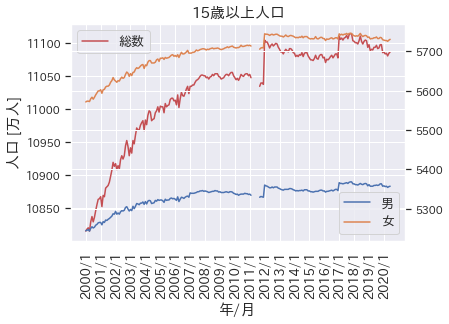

In [12]:
x,y = get_data()
x_male,y_male = get_data(cat03="1")
x_female,y_female = get_data(cat03="2")
ticks = 12

fig, ax1 = plt.subplots()
ax1.plot(x,y,label="総数",color="r")
ax2 = ax1.twinx()
ax2.plot(x_male,y_male,label="男")
ax2.plot(x_female,y_female,label="女")
#ax1.set_yticklabels(fontsize=15)
#ax2.set_yticklabels(fontsize=15)
ax1.set_xticks(range(0,len(x),ticks))
ax2.set_xticks(range(0,len(x),ticks))
ax1.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax2.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax1.legend(fontsize=13)
ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
ax1.set_title("15歳以上人口", fontsize=15)
plt.show()

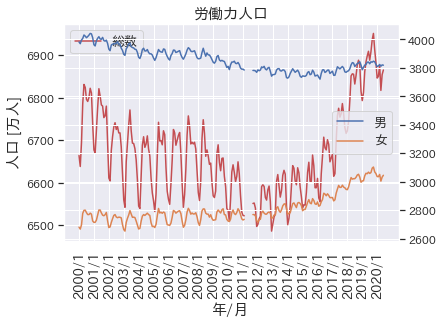

In [20]:
x,y = get_data(cat02="01")
x_male,y_male = get_data(cat02="01",cat03="1")
x_female,y_female = get_data(cat02="01",cat03="2")
ticks = 12

fig, ax1 = plt.subplots()
ax1.plot(x,y,label="総数",color="r")
ax2 = ax1.twinx()
ax2.plot(x_male,y_male,label="男")
ax2.plot(x_female,y_female,label="女")
#ax1.set_yticklabels(fontsize=15)
#ax2.set_yticklabels(fontsize=15)
ax1.set_xticks(range(0,len(x),ticks))
ax2.set_xticks(range(0,len(x),ticks))
ax1.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax2.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax1.legend(fontsize=13)
ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
ax1.set_title("労働力人口", fontsize=15)
plt.show()

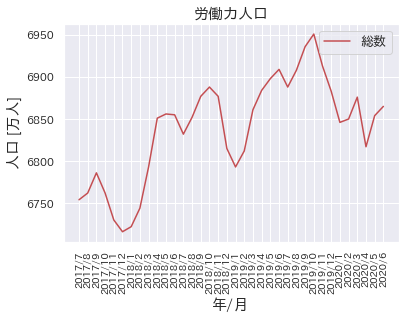

In [45]:
x,y = get_data(cat02="01")
#x_male,y_male = get_data(cat02="01",cat03="1")
#x_female,y_female = get_data(cat02="01",cat03="2")

fig, ax1 = plt.subplots()
ax1.plot(x[-36:],y[-36:],label="総数",color="r")
#ax2 = ax1.twinx()
#ax2.plot(x_male[-36:],y_male[-36:],label="男")
#ax2.plot(x_female[-36:],y_female[-36:],label="女")
#ax1.set_yticklabels(fontsize=15)
#ax2.set_yticklabels(fontsize=15)
ax1.set_xticks(range(0,len(x[-36:])))
#ax2.set_xticks(range(0,len(x[-36:])))
ax1.set_xticklabels(x[-36:], rotation=90, fontsize=10)
#ax2.set_xticklabels(x[-36:], rotation=90, fontsize=10)
ax1.legend(fontsize=13)
#ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
ax1.set_title("労働力人口", fontsize=15)
plt.show()

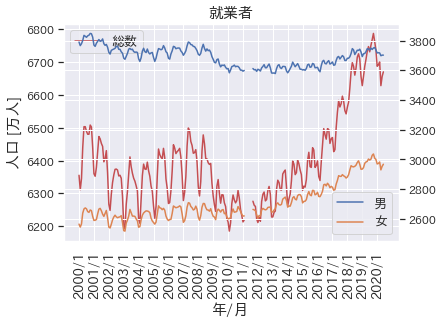

In [38]:
x,y = get_data(cat02="02")
x_male,y_male = get_data(cat02="02",cat03="1")
x_female,y_female = get_data(cat02="02",cat03="2")
ticks = 12

fig, ax1 = plt.subplots()
ax1.plot(x,y,label="総数",color="r")
ax2 = ax1.twinx()
ax2.plot(x_male,y_male,label="男")
ax2.plot(x_female,y_female,label="女")
#ax1.set_yticklabels(fontsize=15)
#ax2.set_yticklabels(fontsize=15)
ax1.set_xticks(range(0,len(x),ticks))
ax2.set_xticks(range(0,len(x),ticks))
ax1.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax2.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax1.legend(fontsize=13)
ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
ax1.set_title("就業者", fontsize=15)
plt.show()

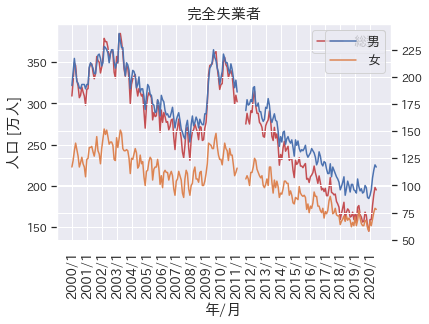

In [44]:
x,y = get_data(cat02="08")
x_male,y_male = get_data(cat02="08",cat03="1")
x_female,y_female = get_data(cat02="08",cat03="2")
ticks = 12

fig, ax1 = plt.subplots()
ax1.plot(x,y,label="総数",color="r")
ax2 = ax1.twinx()
ax2.plot(x_male,y_male,label="男")
ax2.plot(x_female,y_female,label="女")
#ax1.set_yticklabels(fontsize=15)
#ax2.set_yticklabels(fontsize=15)
ax1.set_xticks(range(0,len(x),ticks))
ax2.set_xticks(range(0,len(x),ticks))
ax1.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax2.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax1.legend(fontsize=13)
ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
ax1.set_title("完全失業者", fontsize=15)
plt.show()

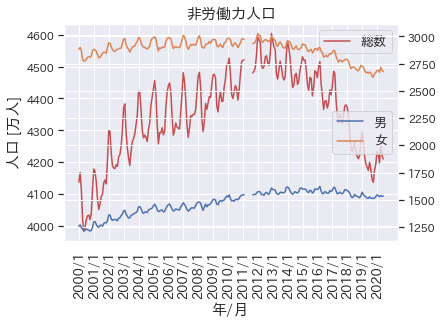

In [47]:
x,y = get_data(cat02="09")
x_male,y_male = get_data(cat02="09",cat03="1")
x_female,y_female = get_data(cat02="09",cat03="2")
ticks = 12

fig, ax1 = plt.subplots()
ax1.plot(x,y,label="総数",color="r")
ax2 = ax1.twinx()
ax2.plot(x_male,y_male,label="男")
ax2.plot(x_female,y_female,label="女")
#ax1.set_yticklabels(fontsize=15)
#ax2.set_yticklabels(fontsize=15)
ax1.set_xticks(range(0,len(x),ticks))
ax2.set_xticks(range(0,len(x),ticks))
ax1.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax2.set_xticklabels([x[i] for i in range(0,len(x),ticks)], rotation=90, fontsize=13)
ax1.legend(fontsize=13)
ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
ax1.set_title("非労働力人口", fontsize=15)
plt.show()

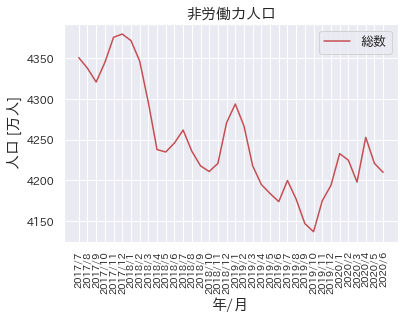

In [48]:
x,y = get_data(cat02="09")
#x_male,y_male = get_data(cat02="09",cat03="1")
#x_female,y_female = get_data(cat02="09",cat03="2")

fig, ax1 = plt.subplots()
ax1.plot(x[-36:],y[-36:],label="総数",color="r")
#ax2 = ax1.twinx()
#ax2.plot(x_male[-36:],y_male[-36:],label="男")
#ax2.plot(x_female[-36:],y_female[-36:],label="女")
#ax1.set_yticklabels(fontsize=15)
#ax2.set_yticklabels(fontsize=15)
ax1.set_xticks(range(0,len(x[-36:])))
#ax2.set_xticks(range(0,len(x[-36:])))
ax1.set_xticklabels(x[-36:], rotation=90, fontsize=10)
#ax2.set_xticklabels(x[-36:], rotation=90, fontsize=10)
ax1.legend(fontsize=13)
#ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
ax1.set_title("非労働力人口", fontsize=15)
plt.show()

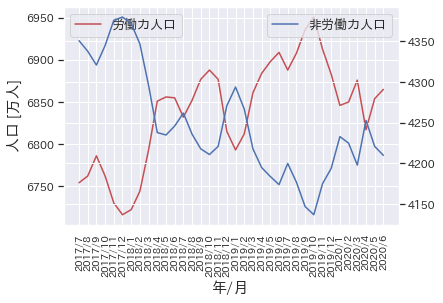

In [49]:
x,y = get_data(cat02="01")
x1,y1 = get_data(cat02="09")

fig, ax1 = plt.subplots()
ax1.plot(x[-36:],y[-36:],label="労働力人口",color="r")
ax2 = ax1.twinx()
ax2.plot(x1[-36:],y1[-36:],label="非労働力人口")
ax1.set_xticks(range(0,len(x[-36:])))
ax2.set_xticks(range(0,len(x1[-36:])))
ax1.set_xticklabels(x[-36:], rotation=90, fontsize=10)
ax2.set_xticklabels(x1[-36:], rotation=90, fontsize=10)
ax1.legend(fontsize=13)
ax2.legend(fontsize=13)
ax1.set_xlabel("年/月", fontsize=15)
ax1.set_ylabel("人口 [万人]", fontsize=15)
plt.show()

In [43]:
x = []
for data in d["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]:
    x.append(data["@cat02"])
from collections import Counter as cc
print(cc(x))

Counter({'00': 738, '01': 738, '02': 738, '08': 738, '09': 738})


# クレジット
「このサービスは、政府統計総合窓口(e-Stat)のAPI機能を使用していますが、サービスの内容は国によって保証されたものではありません。」  
(https://www.e-stat.go.jp/api/api-info/credit)